In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import nltk
from nltk.corpus import stopwords
import re
import spacy
from collections import Counter
from xgboost import XGBClassifier

# Download necessary NLTK data
nltk.download('stopwords')

# Download spaCy French model
spacy.cli.download("fr_core_news_sm")

# Load spaCy French model
nlp = spacy.load('fr_core_news_sm')

# Load the dataset
file_path = 'projetintegrer.csv'  # Update the path if necessary
data = pd.read_csv(file_path)

# Initialize French stopwords
stop_words = set(stopwords.words('french'))

# Function to clean tokenized text
def clean_text(tokens):
    # Remove punctuation and special characters
    tokens = [re.sub(r'\W+', '', token) for token in tokens]
    # Convert to lowercase
    tokens = [token.lower() for token in tokens]
    # Remove stopwords
    tokens = [token for token in tokens if token not in stop_words]
    # Lemmatize using spaCy
    doc = nlp(' '.join(tokens))
    tokens = [token.lemma_ for token in doc]
    # Remove short words
    tokens = [token for token in tokens if len(token) > 2]
    return tokens

# Apply cleaning function to tokenized text
data['Cleaned_Tokens'] = data['Tokenized'].apply(lambda x: clean_text(eval(x)))

# Flatten the list of tokens to create a single list of all words
all_words = [word for tokens in data['Cleaned_Tokens'] for word in tokens]

# Calculate the frequency of each word
word_freq = Counter(all_words)

# Define a threshold for rare words (e.g., words that appear less than 5 times)
threshold = 5

# Create a set of rare words
rare_words = {word for word, freq in word_freq.items() if freq < threshold}

# Function to remove rare words from tokenized text
def remove_rare_words(tokens):
    return [token for token in tokens if token not in rare_words]

# Apply the function to remove rare words
data['Cleaned_Tokens'] = data['Cleaned_Tokens'].apply(remove_rare_words)
data['Cleaned_Text'] = data['Cleaned_Tokens'].apply(lambda x: ' '.join(x))

# Generate dummy sentiment labels for demonstration (replace with actual labels if available)
import numpy as np
np.random.seed(42)
data['Sentiment'] = np.random.choice([0, 1], size=len(data))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['Cleaned_Text'], data['Sentiment'], test_size=0.2, random_state=42)

# Adjusting the TF-IDF vectorizer parameters
vectorizer = TfidfVectorizer(
    max_features=5000,  # Consider only the top 5000 features
    ngram_range=(1, 2),  # Consider unigrams and bigrams
    max_df=0.95,  # Ignore terms that appear in more than 95% of the documents
    min_df=2  # Ignore terms that appear in fewer than 2 documents
)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Define hyperparameters for Grid Search
param_grid_nb = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Perform Grid Search for Naive Bayes
nb_model = MultinomialNB()
grid_search_nb = GridSearchCV(nb_model, param_grid_nb, cv=5, scoring='accuracy')
grid_search_nb.fit(X_train_tfidf, y_train)
nb_best = grid_search_nb.best_estimator_

# Train and evaluate the best Naive Bayes model
nb_pred = nb_best.predict(X_test_tfidf)
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_report = classification_report(y_test, nb_pred)

print("Naive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes Classification Report:\n", nb_report)

# Perform Grid Search for Random Forest
rf_model = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train_tfidf, y_train)
rf_best = grid_search_rf.best_estimator_

# Train and evaluate the best Random Forest model
rf_pred = rf_best.predict(X_test_tfidf)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_report = classification_report(y_test, rf_pred)

print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:\n", rf_report)

# Perform Grid Search for XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5, scoring='accuracy')
grid_search_xgb.fit(X_train_tfidf, y_train)
xgb_best = grid_search_xgb.best_estimator_

# Train and evaluate the best XGBoost model
xgb_pred = xgb_best.predict(X_test_tfidf)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_report = classification_report(y_test, xgb_pred)

print("XGBoost Accuracy:", xgb_accuracy)
print("XGBoost Classification Report:\n", xgb_report)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes Accuracy: 0.46437994722955145
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.46      1.00      0.63       176
           1       0.00      0.00      0.00       203

    accuracy                           0.46       379
   macro avg       0.23      0.50      0.32       379
weighted avg       0.22      0.46      0.29       379

Random Forest Accuracy: 0.503957783641161
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.52      0.49       176
           1       0.54      0.49      0.51       203

    accuracy                           0.50       379
   macro avg       0.51      0.51      0.50       379
weighted avg       0.51      0.50      0.50       379

XGBoost Accuracy: 0.48021108179419525
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.88      0.61       176
         

In [8]:
!pip install smote
!pip install imbalanced-learn
!pip install GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline



ERROR: Could not find a version that satisfies the requirement GridSearchCV (from versions: none)
ERROR: No matching distribution found for GridSearchCV


In [9]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)


# Naive Bayes
nb_model = MultinomialNB()
grid_search_nb = GridSearchCV(nb_model, param_grid_nb, cv=5, scoring='accuracy')
grid_search_nb.fit(X_train_resampled, y_train_resampled)
nb_best = grid_search_nb.best_estimator_

# Train and evaluate the best Naive Bayes model
nb_pred = nb_best.predict(X_test_tfidf)
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_report = classification_report(y_test, nb_pred)

print("Naive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes Classification Report:\n", nb_report)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train_resampled, y_train_resampled)
rf_best = grid_search_rf.best_estimator_

# Train and evaluate the best Random Forest model
rf_pred = rf_best.predict(X_test_tfidf)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_report = classification_report(y_test, rf_pred)

print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:\n", rf_report)

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5, scoring='accuracy')
grid_search_xgb.fit(X_train_resampled, y_train_resampled)
xgb_best = grid_search_xgb.best_estimator_

# Train and evaluate the best XGBoost model
xgb_pred = xgb_best.predict(X_test_tfidf)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_report = classification_report(y_test, xgb_pred)

print("XGBoost Accuracy:", xgb_accuracy)
print("XGBoost Classification Report:\n", xgb_report)

Naive Bayes Accuracy: 0.49340369393139843
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.56      0.51       176
           1       0.53      0.44      0.48       203

    accuracy                           0.49       379
   macro avg       0.50      0.50      0.49       379
weighted avg       0.50      0.49      0.49       379

Random Forest Accuracy: 0.525065963060686
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.47      0.48       176
           1       0.56      0.57      0.56       203

    accuracy                           0.53       379
   macro avg       0.52      0.52      0.52       379
weighted avg       0.52      0.53      0.52       379

XGBoost Accuracy: 0.5408970976253298
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.40      0.45       176
          

In [4]:
import pandas as pd

input_file_path = 'projetintegrer.csv'
df = pd.read_csv(input_file_path)

if 'Cleaned_Tokens' not in df.columns:
    raise ValueError("mkynach had l column")

tokens = df['Cleaned_Tokens']

output_file_path = 'newp.csv'
tokens.to_csv(output_file_path, index = False, header = True)

print(f"Extracted tokens have been saved to {output_file_path}")

Extracted tokens have been saved to newp.csv


In [5]:
from imblearn.over_sampling import SMOTE

In [6]:

file_path = 'projetintegrer.csv'
data = pd.read_csv(file_path)

In [9]:
print(data.columns)

#X = data['Cleaned_Tokens'].apply(lambda x: ' '.join(eval(x)))
#y = data['Sentiment']

Index(['Text', 'Tokenized', 'Cleaned_Tokens'], dtype='object')


In [10]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

file_path = 'projetintegrer.csv'
data = pd.read_csv(file_path)

analyzer = SentimentIntensityAnalyzer()

def classify_sentiment_vader(text):
    score = analyzer.polarity_scores(text)
    if score['compound'] >= 0.7:
        return 3 #++++positive
    elif score['compound'] > 0.1:
        return 2 #positive
    elif score['compound'] > -0.1:
        return 1 #neutral
    elif score['compound'] > -0.7:
        return 0 #neg
    else:
        return 4 #++++++++++++neg
    
data['Sentiment'] = data['Cleaned_Tokens'].apply(lambda x: classify_sentiment_vader(' '.join(eval(x))))

data.to_csv('zouhirdata.csv', index=False)

print(data.head())


                                                Text  \
0                                    lord god angels   
1  blessings iv hated needles young strong im for...   
2  stage 4 small cell stage 5 3 1 2 years took 16...   
3                                      get well soon   
4                                      get well soon   

                                           Tokenized  \
0                          ['lord', 'god', 'angels']   
1  ['blessings', 'iv', 'hated', 'needles', 'young...   
2  ['stage', 'small', 'cell', 'stage', 'years', '...   
3                            ['get', 'well', 'soon']   
4                            ['get', 'well', 'soon']   

                                      Cleaned_Tokens  Sentiment  
0                           ['lord', 'god', 'angel']          2  
1  ['blessing', 'hated', 'needle', 'young', 'stro...          3  
2  ['stage', 'small', 'cell', 'stage', 'year', 't...          3  
3                            ['get', 'well', 'soon']          

In [11]:
from textblob import TextBlob

#def to classify sentiment
def classify_sentiment_textblob(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity >= 0.7:
        return 3  # Hyper-positive
    elif polarity > 0.1:
        return 2  # Positive
    elif polarity > -0.1:
        return 1  # Neutral
    elif polarity > -0.7:
        return 0  # Negative
    else:
        return 4 #Hyper-negative
    
data['Sentiment'] = data['Cleaned_Tokens'].apply(lambda x: classify_sentiment_textblob(' '.join(eval(x))))

data.to_csv('data.csv', index=False)

print(data.head())


                                                Text  \
0                                    lord god angels   
1  blessings iv hated needles young strong im for...   
2  stage 4 small cell stage 5 3 1 2 years took 16...   
3                                      get well soon   
4                                      get well soon   

                                           Tokenized  \
0                          ['lord', 'god', 'angels']   
1  ['blessings', 'iv', 'hated', 'needles', 'young...   
2  ['stage', 'small', 'cell', 'stage', 'years', '...   
3                            ['get', 'well', 'soon']   
4                            ['get', 'well', 'soon']   

                                      Cleaned_Tokens  Sentiment  
0                           ['lord', 'god', 'angel']          1  
1  ['blessing', 'hated', 'needle', 'young', 'stro...          2  
2  ['stage', 'small', 'cell', 'stage', 'year', 't...          2  
3                            ['get', 'well', 'soon']          

In [18]:
!pip install transformers torch

from transformers import pipeline

# Initialize the sentiment-analysis pipeline
classifier = pipeline('sentiment-analysis')

# Function to classify sentiment
def classify_sentiment_bert(text):
    max_lenght = 512
    truncated_text = text[:max_lenght]
    result = classifier(text)[0]
    label = result['label']
    if label == 'HPos':  
        return 3
    elif label == 'Pos':  
        return 2
    elif label == 'N': 
        return 1
    elif label == 'Neg':  
        return 0
    else:  
        return 4
    
def classify_long_text(text):
    max_lenght = 512
    chunks = [text[i:i + max_lenght] for i in range(0, len(text), max_lenght)]
    sentiments = [classify_sentiment_bert(chunk) for chunk in chunks]
    return max(set(sentiments), key = sentiments.count)

file_path = 'newp.csv'
data = pd.read_csv(file_path)

# Apply sentiment classification
data['Sentiment'] = data['Cleaned_Tokens'].apply(lambda x: classify_long_text(' '.join(eval(x))))

# Save the labeled data to a new CSV file (optional)
data.to_csv('med.csv', index=False)

# Verify the new column
print(data.head())


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


                                      Cleaned_Tokens  Sentiment
0                           ['lord', 'god', 'angel']          4
1  ['blessing', 'hated', 'needle', 'young', 'stro...          4
2  ['stage', 'small', 'cell', 'stage', 'year', 't...          4
3                            ['get', 'well', 'soon']          4
4                            ['get', 'well', 'soon']          4


In [20]:
import pandas as pd
#textblob distribution
file_path = 'data.csv'
data = pd.read_csv(file_path)


sentiment_counts = data['Sentiment'].value_counts().sort_index()

sentiment_proportions = sentiment_counts / len(data)

sentiment_summary = pd.DataFrame({
    'Count': sentiment_counts,
    'Proportion': sentiment_proportions
})

print(sentiment_summary)

           Count  Proportion
Sentiment                   
0            104    0.055026
1            612    0.323810
2           1005    0.531746
3            158    0.083598
4             11    0.005820


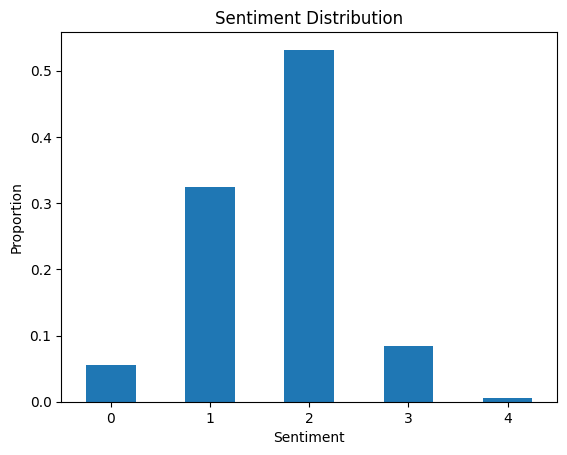

In [22]:
import matplotlib.pyplot as plt
#textblob distribution
# Plot the sentiment distribution
sentiment_summary.plot(kind='bar', y='Proportion', legend=False)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()


In [23]:
import pandas as pd
#vader distribution
file_path = 'zouhirdata.csv'
data = pd.read_csv(file_path)


sentiment_counts = data['Sentiment'].value_counts().sort_index()

sentiment_proportions = sentiment_counts / len(data)

sentiment_summary = pd.DataFrame({
    'Count': sentiment_counts,
    'Proportion': sentiment_proportions
})

print(sentiment_summary)

           Count  Proportion
Sentiment                   
0            172    0.091005
1            229    0.121164
2            516    0.273016
3            877    0.464021
4             96    0.050794


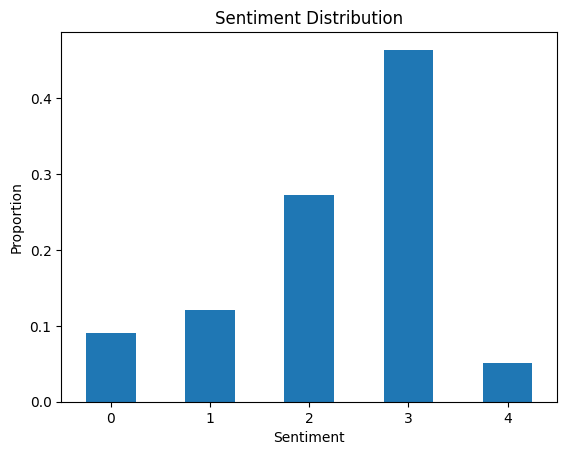

In [24]:
import matplotlib.pyplot as plt

# Plot the sentiment distribution
sentiment_summary.plot(kind='bar', y='Proportion', legend=False)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()


In [26]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

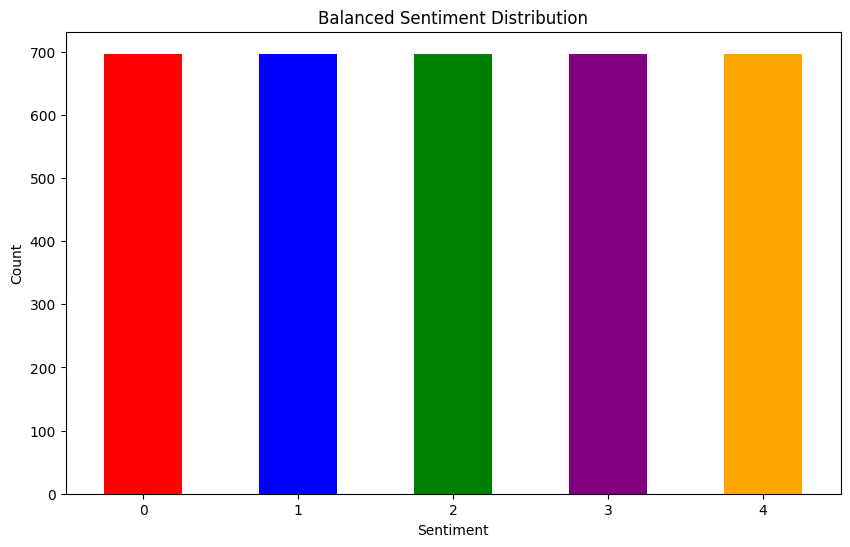

In [33]:
file_path = 'zouhirdata.csv'
data = pd.read_csv(file_path)

data['Cleaned_Tokens'] = data['Cleaned_Tokens'].apply(eval)

X = data['Cleaned_Tokens'].apply(lambda x: ' '.join(x))
y = data['Sentiment']

#Tf-idf
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Display the distribution of the balanced training set
balanced_counts = pd.Series(y_train_balanced).value_counts().sort_index()

# Plot the balanced sentiment distribution
plt.figure(figsize=(10, 6))
balanced_counts.plot(kind='bar', color=['red', 'blue', 'green', 'purple', 'orange'])
plt.title('Balanced Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [34]:
#training the model after balanncing the csv file based on textblob
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

#train the model
nb_model = MultinomialNB()
nb_model.fit(X_train_balanced, y_train_balanced)
nb_predictions = nb_model.predict(X_test)

# Evaluate the Naive Bayes model
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_predictions))
print("Naive Bayes Classification Report:")
print(classification_report(y_test, nb_predictions))

Naive Bayes Accuracy: 0.6005291005291006
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.39      0.33        33
           1       0.88      0.40      0.55        53
           2       0.50      0.39      0.44        89
           3       0.76      0.82      0.79       180
           4       0.23      0.43      0.30        23

    accuracy                           0.60       378
   macro avg       0.53      0.49      0.48       378
weighted avg       0.64      0.60      0.60       378



In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

#train the model random forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train_balanced, y_train_balanced)
rf_predictions = rf_model.predict(X_test)

#ecaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))


Random Forest Accuracy: 0.6878306878306878
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.52      0.43        33
           1       0.67      0.85      0.75        53
           2       0.59      0.56      0.57        89
           3       0.84      0.82      0.83       180
           4       0.20      0.04      0.07        23

    accuracy                           0.69       378
   macro avg       0.53      0.56      0.53       378
weighted avg       0.68      0.69      0.68       378



In [43]:
from xgboost import XGBClassifier

#train the model
xgb_model = XGBClassifier()
xgb_model.fit(X_train_balanced, y_train_balanced)
xgb_predictions = xgb_model.predict(X_test)

#evaluation
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_predictions))
print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_predictions))

XGBoost Accuracy: 0.708994708994709
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.48      0.48        33
           1       0.63      0.83      0.72        53
           2       0.57      0.57      0.57        89
           3       0.86      0.83      0.85       180
           4       0.58      0.30      0.40        23

    accuracy                           0.71       378
   macro avg       0.63      0.61      0.60       378
weighted avg       0.71      0.71      0.71       378



In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

knn_model = KNeighborsClassifier()
knn_model.fit(X_train_balanced, y_train_balanced)
knn_predictions = knn_model.predict(X_test)

#evvaluation
print("KNN Accuracy:", accuracy_score(y_test, knn_predictions))
print("KNN Classification Report:")
print(classification_report(y_test, knn_predictions))

KNN Accuracy: 0.24867724867724866
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.23      0.09      0.13        33
           1       0.16      0.94      0.28        53
           2       0.61      0.35      0.44        89
           3       1.00      0.05      0.10       180
           4       1.00      0.04      0.08        23

    accuracy                           0.25       378
   macro avg       0.60      0.30      0.21       378
weighted avg       0.72      0.25      0.21       378



In [46]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Train an SVM model
svm_model = SVC()
svm_model.fit(X_train_balanced, y_train_balanced)
svm_predictions = svm_model.predict(X_test)

# Evaluate the SVM model
print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))
print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions))

SVM Accuracy: 0.626984126984127
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.21      0.30        33
           1       0.87      0.25      0.38        53
           2       0.42      0.56      0.48        89
           3       0.73      0.93      0.81       180
           4       0.00      0.00      0.00        23

    accuracy                           0.63       378
   macro avg       0.50      0.39      0.40       378
weighted avg       0.61      0.63      0.58       378



In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Train a Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train_balanced, y_train_balanced)
logreg_predictions = logreg_model.predict(X_test)

# Evaluate the Logistic Regression model
print("Logistic Regression Accuracy:", accuracy_score(y_test, logreg_predictions))
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logreg_predictions))

Logistic Regression Accuracy: 0.6428571428571429
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.39      0.38        33
           1       0.55      0.70      0.62        53
           2       0.49      0.55      0.52        89
           3       0.87      0.75      0.80       180
           4       0.45      0.39      0.42        23

    accuracy                           0.64       378
   macro avg       0.55      0.56      0.55       378
weighted avg       0.66      0.64      0.65       378

